In [224]:
import numpy as np
import seaborn as sns

In [258]:
np.random.seed(42)
X = 2 * np.random.rand(100, 1)
y = 4 + 3 * X + np.random.randn(100, 1)

<Axes: >

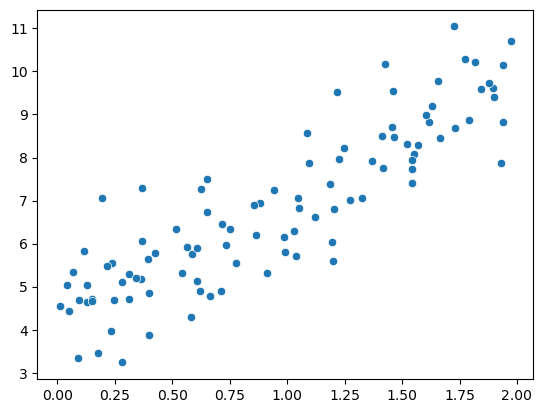

In [259]:
sns.scatterplot(x=X.flatten(), y=y.flatten())

In [260]:
w = 0
b = 0
learning_rate = 0.01
iterations = 1000

In [261]:
def cost_function(X, y, w, b):
    m = len(y)
    predictions = X.dot(w) + b
    cost = (1/(2*m)) * np.sum((predictions - y)**2)
    return cost

In [262]:
cost_function_history = []

In [263]:
for i in range(iterations):
    m = len(y)
    predictions = X.dot(w) + b
    cost = cost_function(X, y, w, b)
    cost_function_history.append(cost)
    d_dw = (1/m) * np.sum((predictions - y) * X)
    d_db = (1/m) * np.sum(predictions - y)
    w = w - (learning_rate * d_dw)
    b = b - (learning_rate * d_db)

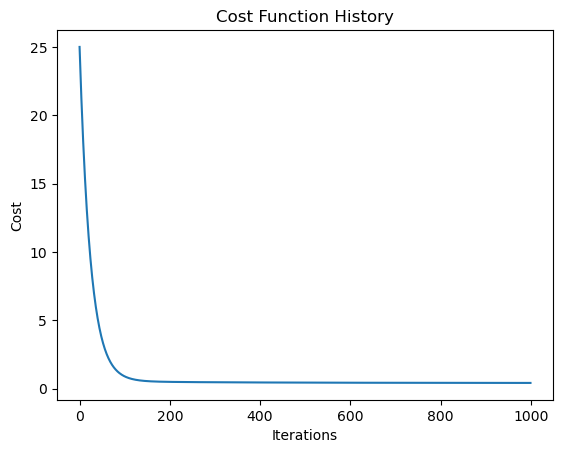

In [264]:
# plot the cost function history
import matplotlib.pyplot as plt
plt.plot(range(iterations), cost_function_history)
plt.xlabel('Iterations')
plt.ylabel('Cost')
plt.title('Cost Function History')
plt.show()

In [265]:
predictions = X.dot(w) + b

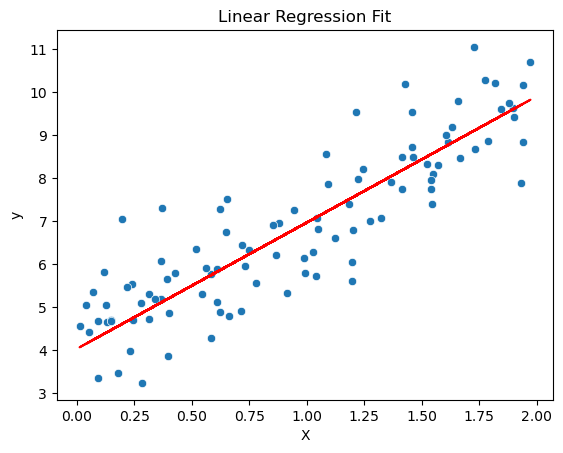

In [266]:
# plot the regression line
sns.scatterplot(x=X.flatten(), y=y.flatten())
plt.plot(X, predictions, color='red')
plt.xlabel('X')
plt.ylabel('y')
plt.title('Linear Regression Fit')
plt.show()

In [267]:
class LinearRegression:
    def __init__(self, learning_rate=0.01, iterations=1000):
        self.learning_rate = learning_rate
        self.iterations = iterations
        self.w = 0
        self.b = 0
        
    def fit(self, X, y):
        for i in range(self.iterations):
            m = len(y)
            predictions = X.dot(self.w) + self.b
            d_dw = (1/m) * np.sum((predictions - y) * X)
            d_db = (1/m) * np.sum(predictions - y)
            self.w = self.w - (self.learning_rate * d_dw)
            self.b = self.b - (self.learning_rate * d_db)
            
    def predict(self, X):
        predictions = X.dot(self.w) + self.b
        return predictions

In [268]:
lin = LinearRegression(learning_rate=0.005, iterations=1000)
lin.fit(X, y)

In [269]:
predictions = lin.predict(X)

In [270]:
mse = np.mean((y - predictions) ** 2)
print("MSE:", mse)

MSE: 0.8612359860226928


In [271]:
print("Min y:", y.min())
print("Max y:", y.max())
print("RMSE:", np.sqrt(mse))


Min y: 3.2380621152873488
Max y: 11.044395066398318
RMSE: 0.9280280092878085
